In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Para renderear el texto de los gráficos de matplotlib con LaTeX, descomentar plt.rcdefaults() para desctivarlo
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.rcdefaults()

df = pd.read_csv("output.csv")
df.head()
df.shape


(128, 7)

In [158]:
# Ajusto los #SEQ

df['#SEQ'] = range(df.shape[0])

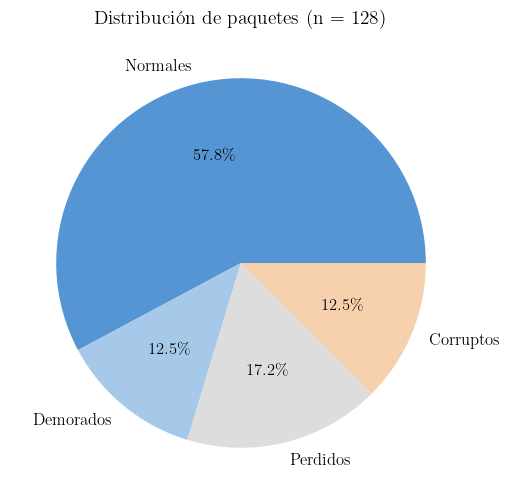

In [194]:
plt.figure(figsize=(10, 6))
cant_enviados = df.shape[0]
cant_recibidos = (df['time_received'] != 0).sum()
cant_corruptos = (df['corrupto'] == 1).sum()
cant_demorados = (df['demorado'] == 1).sum()
cant_perdidos = (df['perdido'] == 1).sum()
cant_normal = cant_enviados - cant_perdidos - cant_corruptos - cant_demorados

proporciones = {'Normales': cant_normal, 'Demorados': cant_demorados,
                'Perdidos': cant_perdidos, 'Corruptos': cant_corruptos}

proporciones = {key: 100*value/cant_enviados for key, value in proporciones.items()}

colors = ['#5595D4', '#A7C9E9', '#DDDDDD', '#F7D0AE', '#EDA060']

plt.pie(list(proporciones.values()), labels=list(proporciones.keys()), autopct='%1.1f%%', colors=colors, textprops={'fontsize': 12})
plt.title(f'Distribución de paquetes (n = {cant_enviados})', fontsize=14)

# Para guardar la imagen
#plt.savefig('d.png', dpi=300, bbox_inches='tight')

plt.show()

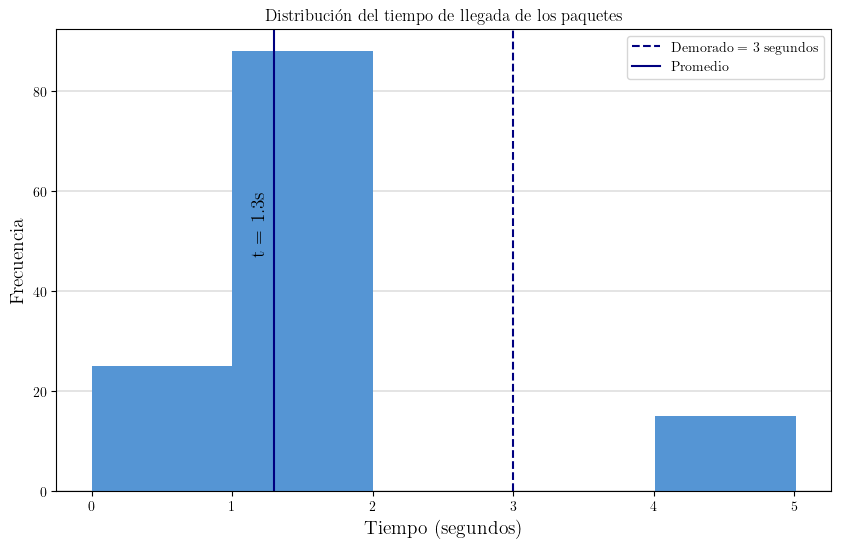

In [197]:
plt.figure(figsize=(10, 6))

plt.hist(df['total_time'], bins=5, color=colors[0], zorder=2)
plt.xlabel('Tiempo (segundos)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.title('Distribución del tiempo de llegada de los paquetes')
plt.grid(axis='y', linewidth=0.3, color='grey', zorder=0)

# Add a vertical line at x = 3 (or any value you want)
plt.axvline(x=3, color='navy', linestyle='--', label='Demorado = 3 segundos')
promedio_tiempo = np.mean(df['total_time'])
plt.axvline(x=promedio_tiempo, color='navy', linestyle='-', label='Promedio')
    
plt.text(promedio_tiempo-0.1, 60, f't = {round(promedio_tiempo, 2)}s', 
         color='black', fontsize=14, ha='center', va='top', rotation=90)

plt.legend()

# Para guardar la imagen
#plt.savefig('dist-tiempos-llegada.png', dpi=300, bbox_inches='tight')

plt.show()

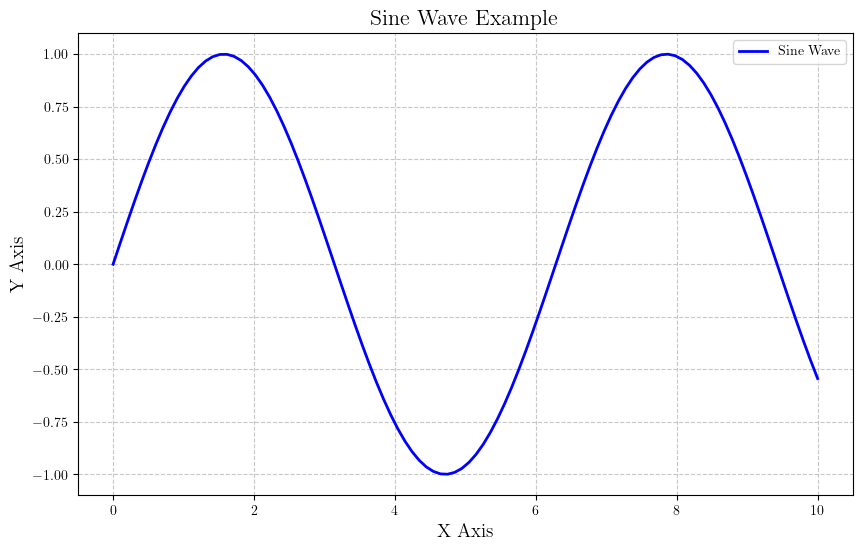

In [180]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', linewidth=2, label='Sine Wave')

# Adding titles and labels
plt.title('Sine Wave Example', fontsize=16, fontweight='bold')
plt.xlabel('X Axis', fontsize=14)
plt.ylabel('Y Axis', fontsize=14)

# Adding grid
plt.grid(True, linestyle='--', alpha=0.7)

# Adding legend
plt.legend()

# Save the figure
plt.savefig('sine_wave.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()